# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import numpy as np
import networkx as nx
from operator import itemgetter
import seaborn as sns

# <font color='powderblue'> Data preprocessing </font>

In [2]:
df=pd.read_csv("d.csv")

In [3]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


In [4]:
#method to parse the weird date format
def parse_date(val):
    hours, rest = val.split(":",1)
    hours = int(hours)%24
    return str(hours)+":"+rest

In [5]:
df["depart_from"] = df["depart_from"].apply(parse_date)
df["arrive_to"] = df["arrive_to"].apply(parse_date)

#changes the new format to datetime
df = df.astype({"arrive_to":"datetime64","depart_from":"datetime64"})

In [6]:
display(df.head(5))

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,2022-12-11 04:53:00,2022-12-11 04:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,2022-12-11 04:54:30,2022-12-11 04:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,2022-12-11 04:56:00,2022-12-11 04:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,2022-12-11 04:59:00,2022-12-11 05:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,2022-12-11 04:36:00,2022-12-11 04:38:00,2,0,1,1,1,1,1,0,0


In this notebook I will only be working with metro and tram subsets. I will not include buses or other transport into this analysis for better visualization.

In [7]:
#splitting the dataset
metro=df.loc[df["route_type"].isin([1])]
tram=df.loc[df["route_type"].isin([0])]
tram.nunique()

stop_from          599
stop_from_name     281
stop_to            591
stop_to_name       280
depart_from       3388
arrive_to         3388
route_type           1
is_night             2
monday               2
tuesday              2
wednesday            2
thursday             2
friday               2
saturday             2
sunday               2
dtype: int64

In [8]:
#grouping the df by each connection
grouped_metro=metro.groupby(["stop_from_name","stop_to_name"])
grouped_metro=grouped_metro.sum().reset_index()
grouped_metro.drop(columns=["route_type","is_night"],inplace=True)
#counts up the nuber of connections between each two stops
grouped_metro["weekly_load"]=grouped_metro.sum(axis=1,numeric_only=True)

grouped_tram=tram.groupby(["stop_from_name","stop_to_name"])
grouped_tram=grouped_tram.sum().reset_index()
grouped_tram.drop(columns=["route_type","is_night"],inplace=True)
grouped_tram["weekly_load"]=grouped_tram.sum(axis=1,numeric_only=True)
display(grouped_tram.head(3))

,stop_from_name,stop_to_name,monday,tuesday,wednesday,thursday,friday,saturday,sunday,weekly_load
0,Albertov,Botanická zahrada,550,550,550,550,550,168,195,3113
1,Albertov,Ostrčilovo náměstí,912,912,912,912,912,250,283,5093
2,Albertov,Výtoň,302,302,302,302,302,86,104,1700


In [9]:
stops=pd.read_csv("stops.txt")
stops=stops.drop_duplicates(subset=['stop_name'])
#don't rally care about anything else than location and name here
stops=stops[["stop_name","stop_lat","stop_lon"]]

# <font color='powderblue'> Basic network analysis </font>

In [10]:
#makes graphs from the dataframe
G_metro = nx.from_pandas_edgelist(grouped_metro, "stop_from_name", "stop_to_name", ["weekly_load"],create_using=nx.DiGraph())
G_tram = nx.from_pandas_edgelist(grouped_tram, "stop_from_name", "stop_to_name", ["weekly_load"],create_using=nx.DiGraph())

#make a dictionary from the dataframe with each stop having its coordinates
d = dict(zip(stops["stop_name"], stops[["stop_lon","stop_lat"]].values))

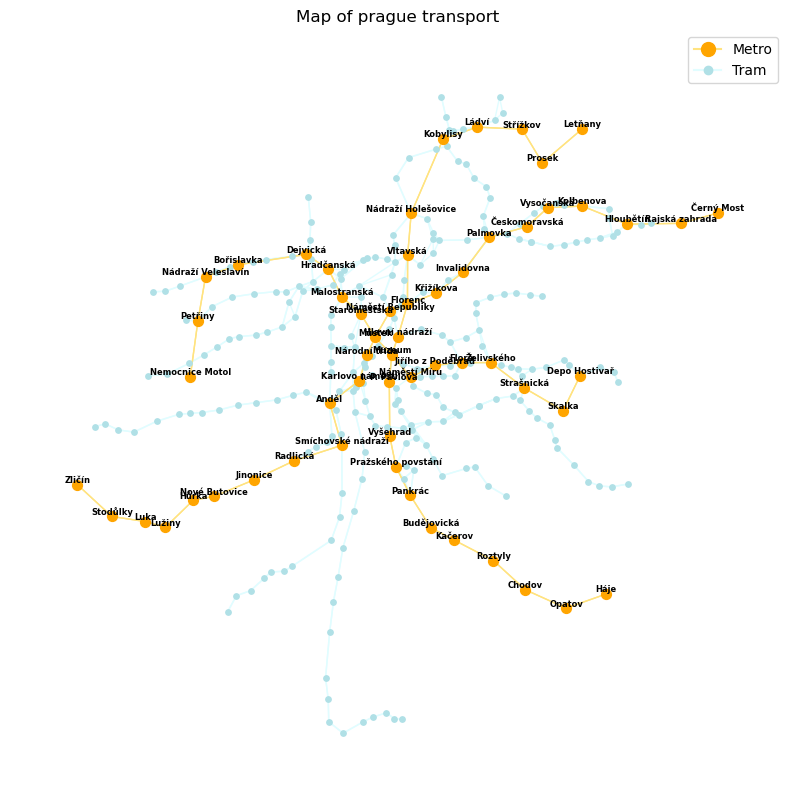

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
#plots both metro and tram into one graph
nx.draw(G_tram,node_size=15,node_color="powderblue",pos=d,edge_color="#e1fdff",arrows=False)
nx.draw(G_metro, with_labels=True,node_size=50,pos=d,font_size=6,font_weight="bold",verticalalignment='bottom',node_color="orange",edge_color="#ffe380",arrows=False)

#adds a legend for bot the metro and tram to the graph
metro_legend = mlines.Line2D([], [], color='#ffe380', marker='o',markersize=10,markerfacecolor="orange",markeredgecolor="orange", label='Metro')
tram_legend = mlines.Line2D([], [], color='#e1fdff', marker='o',markerfacecolor="powderblue",markeredgecolor="powderblue",label='Tram')
ax.set_title("Map of prague transport")
ax.legend(handles=[metro_legend,tram_legend])
plt.show()

This is the best I could do. There are labels in the center that overlap, but I didn't know what to do about these.

# <font color='powderblue'> Centrality analysis </font>

In [12]:
#method for visualizing some graph centrality measures
#adapted from https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
def draw(G,pos, measures, measure_name,node_size=50,write_labels=False):
    nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, cmap=plt.cm.viridis, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(),
                                    )
    if write_labels:
        nx.draw_networkx_labels(G,pos,verticalalignment='bottom')
    edges = nx.draw_networkx_edges(G, pos,arrows=False,edge_color="lightgrey")

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [13]:
#makes a graph for connected metro and tram
transport=df.loc[df["route_type"].isin([0,1])]
grouped_transport=transport.groupby(["stop_from_name","stop_to_name"])
grouped_transport=grouped_transport.sum().reset_index()
grouped_transport.drop(columns=["route_type","is_night"],inplace=True)
grouped_transport["weekly_load"]=grouped_transport.sum(axis=1,numeric_only=True)
G_transport = nx.from_pandas_edgelist(grouped_transport, "stop_from_name", "stop_to_name", ["weekly_load"],create_using=nx.DiGraph())

Muzeum has a betweenness amount of: 0.5451882936638034
Prosek has a betweenness amount of: 0.006589731820864205


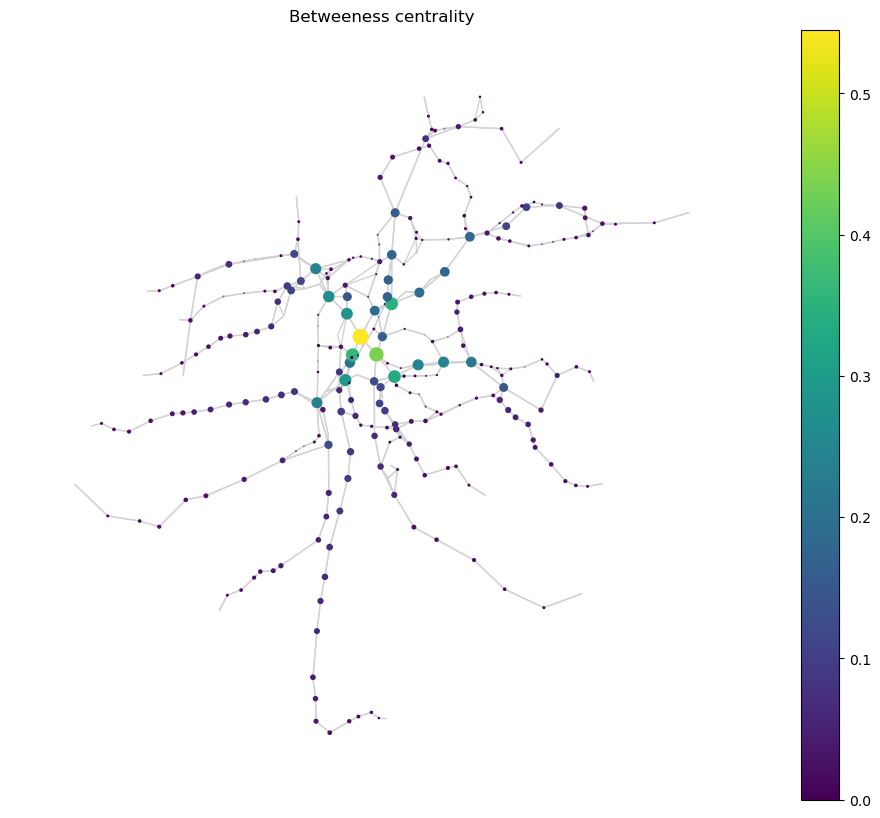

In [14]:
betweeness = nx.betweenness_centrality(G_transport, weight='weekly_load')
print("Muzeum has a betweenness amount of: {}".format(betweeness["Můstek"]))
print("Prosek has a betweenness amount of: {}".format(betweeness["Prosek"]))

fig, ax = plt.subplots(figsize=(12, 10))

#also changes node size based on its importance
draw(G_transport,d,betweeness,"Betweeness centrality",[200*x for x in betweeness.values()])

plt.show()

Betweenness centrality is a measure of how important a certain node is for the shortest way between all other nodes in the graph. If the centrality of a **stop** is high, then the node is an important **transport knot** for all the different routes people in Prague are taking. So on average there is a higher chance that on a way somewhere with public transport, we will pass a high certality stop than low centrality one. Thats why known central transfer stops like **Muzeum** will have higher betweenness than some edge ones like **Prosek**.

The highest weighted degree station is Karlovo náměstí and it has a weekly saturation of: 31223
The lowest weighted degree station is Zvonařka and it has a weekly saturation of: 14


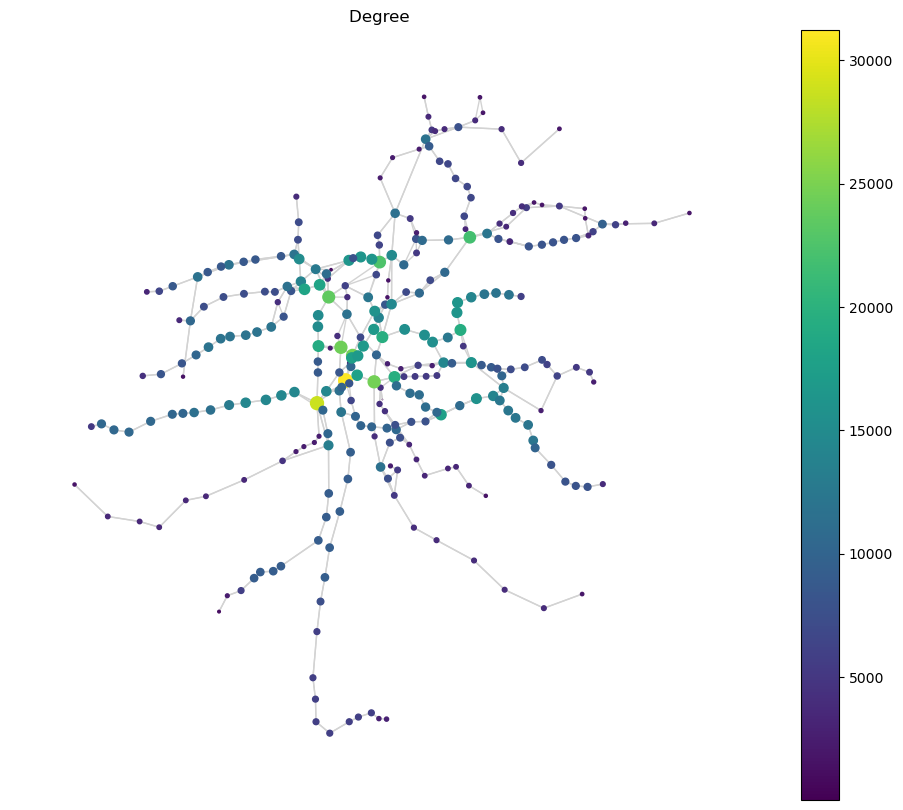

In [15]:
#here I take the degree as a measure of outgoing connections from each stop, this could also be the other way around or a sum of both
degree = G_transport.out_degree(weight='weekly_load')
degree = dict(degree)
print("The highest weighted degree station is {} and it has a weekly saturation of: {}".format(max(degree,key=degree.get),max(degree.values())))
print("The lowest weighted degree station is {} and it has a weekly saturation of: {}".format(min(degree,key=degree.get),min(degree.values())))

fig, ax = plt.subplots(figsize=(12, 10))
draw(G_transport,d,degree,"Degree ",[0.003*x for x in degree.values()])

Degree of a node is a measure of how many edges go to and from a certain node. In addition we can also measure a weighted degree of a node, which is not only the number of in and out edges, but also takes in account the weight of these edges so it is **the sum of weights of all edges going in and out of the node**. Degree and weighted degree centrality is this principle applied to the whole graph. A degree centrality of a node equals to its degree.\
In our case the weighted degree centrality shows the importance of each stop based on how many connections go in and out of that stop. This mostly shows how important the DPP determines that stop is. In general the metro lines will probably have a higher degree just because the metro is usually more frequent than tram. The higher the degree, the more connections there are.

The station with highest eigenvector centrality is Želivského


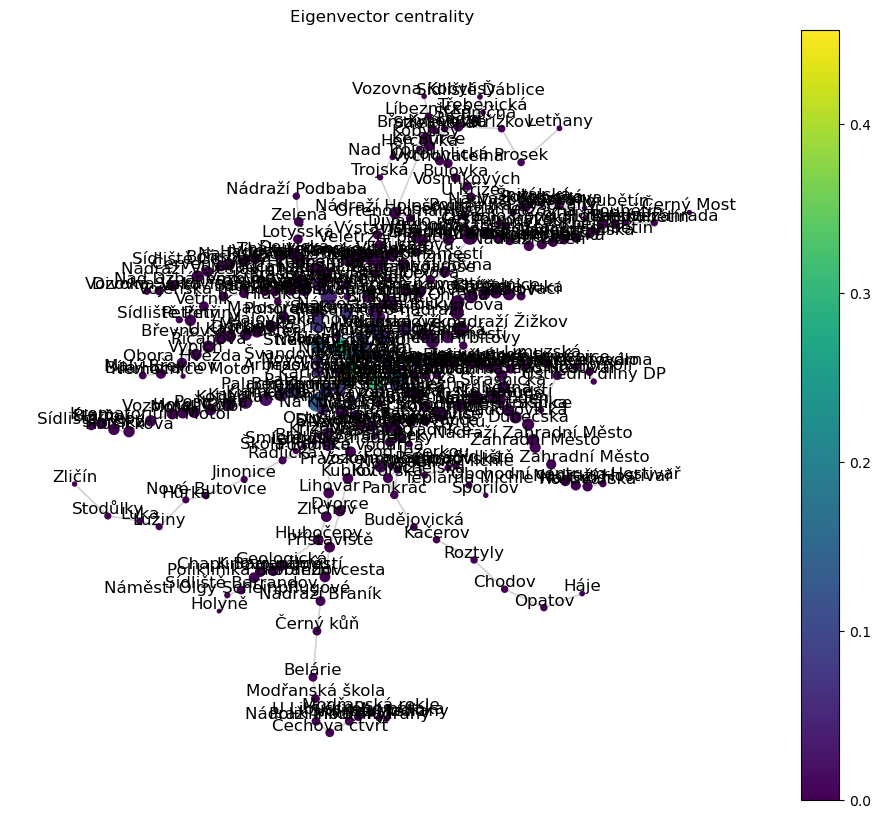

,stop_from_name,stop_to_name,monday,tuesday,wednesday,thursday,friday,saturday,sunday,weekly_load
765,Želivského,Flora,258,258,258,258,258,145,200,1635
766,Želivského,Nákladové nádraží Žižkov,866,866,866,866,866,290,308,4928
767,Želivského,Olšanské hřbitovy,606,606,606,606,606,232,283,3545
768,Želivského,Strašnická,258,258,258,258,258,145,144,1579
769,Želivského,Vinohradské hřbitovy,792,792,792,792,792,244,263,4467


In [16]:
egv = nx.eigenvector_centrality(G_transport,weight='weekly_load')

print("The station with highest eigenvector centrality is {}".format(max(egv)))

fig, ax = plt.subplots(figsize=(12, 10))
draw(G_transport,d,egv,"Eigenvector centrality",[0.005*x for x in degree.values()],ax)

display(grouped_transport[grouped_transport["stop_from_name"]=="Želivského"])

Eigenvector centrality is a measure of not only a degree of a node, but also of degrees of its neigbours. This highlights important nodes in relation to their neigbours. In prague it is the Zelivskeho station which is neigbours with many important nodes including two metro stations Flora and Strasnicka, but also both Pragues biggest cementeries. 

# <font color='powderblue'> Own questions </font>

### <font color='orange'> What is the least amount of stations from Kobylisy to a certain other metro station?</font>

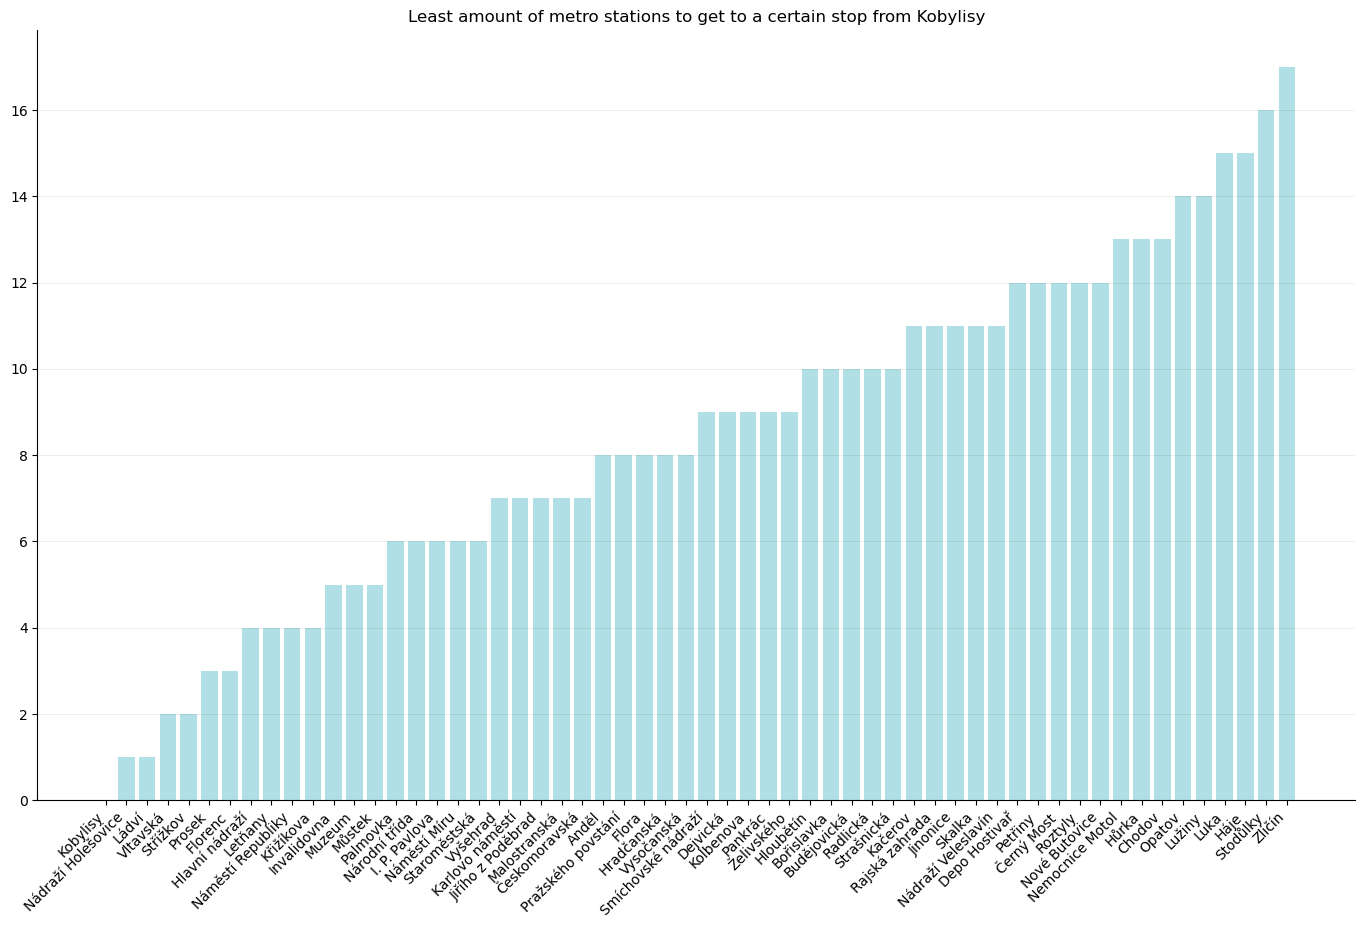

In [17]:
fig, ax = plt.subplots(figsize=(17, 10))
#builtin method, returns a dictionary of names and distances
dist_from_koby = nx.single_source_shortest_path_length(G_metro,"Kobylisy")
#barplot from dictionary
rects = ax.bar(dist_from_koby.keys(),dist_from_koby.values(),color="powderblue")

#better visibility and clearance measures
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis="y", color="black", alpha=.1 , linewidth=0.5)

ax.set_title("Least amount of metro stations to get to a certain stop from Kobylisy")
plt.show()

It is interesting to see that the sorted bar plot looks a bit like the tangent function.

### <font color='orange'> What are the most used day tram stops in relation to nigth stops? Are there some that are very important for both daily and nightly use?</font>

In [18]:
#method that returns the top 10 stations based on out degree from a dataframe with their out degrees as a dictionary
def day_night_tram_load(df_from,is_night):
    df=df_from[df_from["is_night"]==is_night]
    #construct the graph
    G = nx.from_pandas_edgelist(df, "stop_from_name", "stop_to_name", ["weekly_load"],create_using=nx.DiGraph())
    #get the degrees
    deg = dict(G.out_degree(weight='weekly_load'))
    #get the top 10
    deg = dict(sorted(deg.items(), key = itemgetter(1), reverse = True)[:10])
    return deg

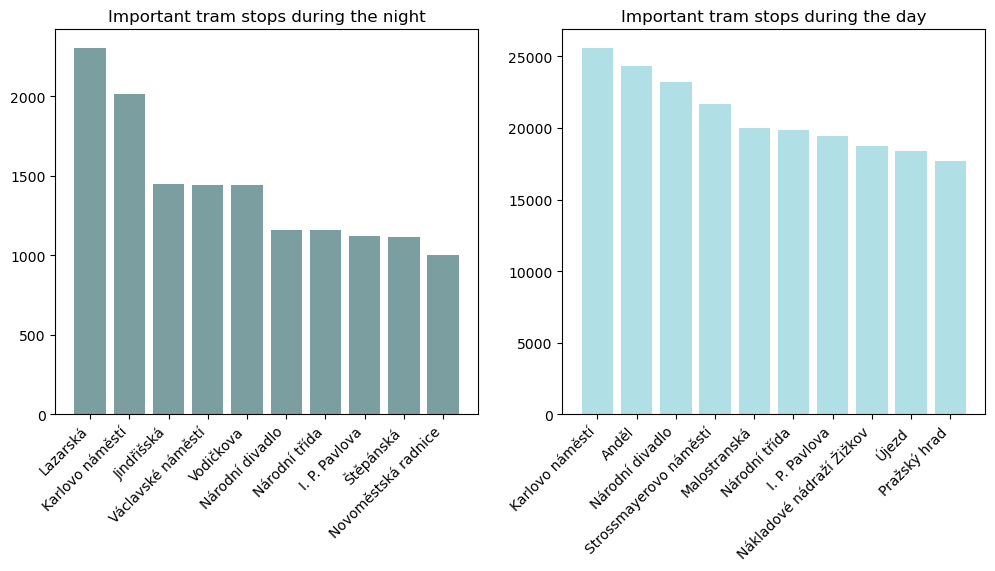

Tram stops that are important both during the day and night are ['Karlovo náměstí', 'Národní divadlo', 'Národní třída', 'I. P. Pavlova']
Tram stops that become more important during the night are ['Lazarská', 'Jindřišská', 'Václavské náměstí', 'Vodičkova', 'Štěpánská', 'Novoměstská radnice']


In [19]:
grouped_tram_with_night=tram.groupby(["stop_from_name","stop_to_name","is_night"])
grouped_tram_with_night=grouped_tram_with_night.sum().reset_index()
grouped_tram_with_night.drop(columns=["route_type"],inplace=True)
grouped_tram_with_night["weekly_load"]=grouped_tram_with_night.sum(axis=1,numeric_only=True)

deg_day = day_night_tram_load(grouped_tram_with_night,0)
deg_night = day_night_tram_load(grouped_tram_with_night,1)

fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[1].bar(deg_day.keys(),deg_day.values(),color="powderblue")
ax[0].bar(deg_night.keys(),deg_night.values(),color="#7b9fa1")

#beeter readability
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')

ax[1].set_title("Important tram stops during the day")
ax[0].set_title("Important tram stops during the night")

plt.show()

print("Tram stops that are important both during the day and night are {}".format([key for key in deg_night if key in deg_day]))
print("Tram stops that become more important during the night are {}".format([key for key in deg_night if key not in deg_day]))

### <font color='orange'> Do the timetables respect Pragues rush hour? What is the distribution of connections in time during the weekends? </font>

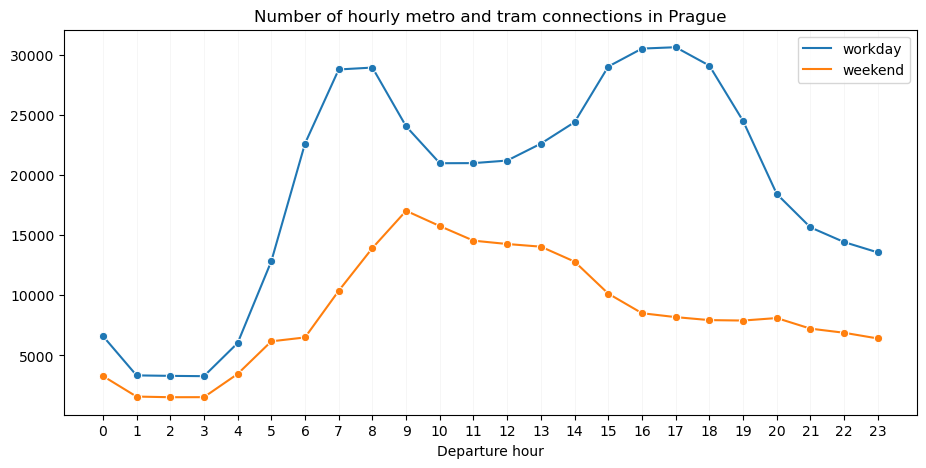

In [20]:
#here I assume that the connections are the same throughout the work week
transport_workday=transport[transport["monday"]==1]
transport_weekend=transport[(transport["saturday"]==1) | (transport["sunday"]==1)]

workday_grouped = transport_workday.groupby([df['depart_from'].dt.hour])["stop_from_name"].count().reset_index()
weekend_grouped = transport_weekend.groupby([df['depart_from'].dt.hour])["stop_to_name"].count().reset_index()

#join the separated counts back into one dataframe
hourly_connections = workday_grouped.join(weekend_grouped["stop_to_name"])
hourly_connections = hourly_connections.drop(columns=["depart_from"])
hourly_connections = hourly_connections.rename(columns={"stop_from_name": "workday",
                                                        "stop_to_name":"weekend"})

fig, ax = plt.subplots(figsize=(11,5))
sns.lineplot(data=hourly_connections,marker="o",dashes=False,ax=ax)

#for better clarity and readability
ax.set_xticks([x for x in range(0,24)])
ax.set_xlabel("Departure hour")
ax.grid(axis="x", color="black", alpha=.05 , linewidth=0.5)


ax.set_title("Number of hourly metro and tram connections in Prague")
plt.show()

We can clearly see, that during the workweek, the hourly load really does reflect the morning and evening rush hours. (7:00-10:00 and 15:00-19:00). However during the weekend it is shifted a bit toward later in the morning, peaking at 9. and only getting lower from there with a bigger dip between 14 and 16 o'clock. The fact that there are in general less connections during the weekends than during the workweek is also present here.